## Business & Data Understanding

My goal is to build models that Twitter can use for sentiment analysis. Twitter would use these models to categorize tweets into positive or negative, and share this information with companies that might be interested to learn more about how customers are reacting to their products. I will be using a dataset comprised of 9,000 tweets from customers of either Apple or Google products.

## Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')

In [4]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


There appear to be many null values in the 'emotion_in_tweet_is_directed_at' column. I will further investigate those values shortly to understand how I should be handling them. 

In [5]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

Each unique value in this column seems to classify the emotion in the tweet as either directed at a Google product or an Apple product. Since there is not an 'Other' value of sorts, I assume that the null values are directed at something non-product related, or that there simply is on emotion in the tweet. I can confirm this by further investigating the dataset.

In [4]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

There appear to be a few categories for this yes or no question. To keep things simple, I will subset the data to only include either 'Positive emotion' or 'Negative emotion'. This will allow me to build a binary classifier. Let's also see how that impacted the null values we noticed.

In [6]:
binary_df = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') | 
               (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3548 entries, 0 to 9088
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          3548 non-null   object
 1   emotion_in_tweet_is_directed_at                     3191 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  3548 non-null   object
dtypes: object(3)
memory usage: 110.9+ KB


Turning this dataset into a binary one seems to have addressed a majority of the null values we saw originally in the 'emotion_in_tweet_is_directed_at' column. However, there are still over 300 null values in that column. Let's take a closer look to see what those might be.

In [7]:
binary_df_nulls = binary_df[binary_df['emotion_in_tweet_is_directed_at'].isna() == True]
binary_df_nulls

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
46,Hand-Held Û÷HoboÛª: Drafthouse launches Û÷H...,NaN,Positive emotion
64,Again? RT @mention Line at the Apple store is ...,NaN,Negative emotion
68,Boooo! RT @mention Flipboard is developing an ...,NaN,Negative emotion
103,Know that &quot;dataviz&quot; translates to &q...,NaN,Negative emotion
112,Spark for #android is up for a #teamandroid aw...,NaN,Positive emotion
...,...,...,...
9011,apparently the line to get an iPad at the #sxs...,NaN,Positive emotion
9043,Hey is anyone doing #sxsw signing up for the g...,NaN,Negative emotion
9049,@mention you can buy my used iPad and I'll pic...,NaN,Positive emotion
9052,@mention You could buy a new iPad 2 tmrw at th...,NaN,Positive emotion


In [11]:
binary_df_nulls['tweet_text'][64]

'Again? RT @mention Line at the Apple store is insane.. #sxsw'

In [12]:
binary_df_nulls['tweet_text'][68]

'Boooo! RT @mention Flipboard is developing an iPhone version, not Android, says @mention #sxsw'

In [13]:
binary_df_nulls['tweet_text'][103]

"Know that &quot;dataviz&quot; translates to &quot;satanic&quot; on an iPhone. I'm just sayin'. #sxsw"

For the above 3 examples - it seems as though there is an emotion and mention of Google or Apple, but the emotion is not necessarily directed at Google or Apple. As such, I will drop these cases since they do not tell us how a customer felt either positively or negatively about the companies or products.

In [14]:
binary_df_nonulls = binary_df.dropna()
binary_df_nonulls = binary_df_nonulls.drop(columns = 'emotion_in_tweet_is_directed_at')
binary_df_nonulls['is_there_an_emotion_directed_at_a_brand_or_product'] = binary_df_nonulls['is_there_an_emotion_directed_at_a_brand_or_product'].apply(lambda x: 0 if x == 'Negative emotion' else 1)
binary_df_nonulls

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,1
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1
...,...,...
9077,@mention your PR guy just convinced me to swit...,1
9079,&quot;papyrus...sort of like the ipad&quot; - ...,1
9080,Diller says Google TV &quot;might be run over ...,0
9085,I've always used Camera+ for my iPhone b/c it ...,1


## Data Pre-Processing
Now that we have turned the dataset into a binary one, I will take further pre-processing steps ahead of modeling. I will adddress the following in the 'tweet_text' column:

- Capitalization
- Apostrophes
- Numbers
- Stopwords

In [15]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re
from sklearn.model_selection import train_test_split

First I will separate the dataset into Train and Test sets so as to avoid any data leakage. We want to maintain the sanctity of the Test set so as to simulate truly 'unseen' data.

In [16]:
X = pd.DataFrame(binary_df_nonulls['tweet_text'])
y = pd.DataFrame(binary_df_nonulls['is_there_an_emotion_directed_at_a_brand_or_product'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Next, I will change all of the tweets to lowercase to ensure on duplication of the same words with different capitlization.

In [23]:
X_train ['tweet_text'] = X_train['tweet_text'].str.lower()
X_train ['tweet_text']

<ipython-input-23-9c83a51a271c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train ['tweet_text'] = X_train['tweet_text'].str.lower()


4840    idea is to combine google analytics with other...
487     hey #sxsw exhibitors, why not capture your boo...
14      great #sxsw ipad app from @madebymany: http://...
8795    got a craving? #sxsw minds created an app for ...
1113    they'd be stupid not to. // apple is opening a...
                              ...                        
2931    *g* rt @mention  love the apple pop-up store a...
3024    texas observer tomlinson says they would doubl...
3481    what's behind #android's race to no. 1? {link}...
2340    #sxsw #enchantment: @mention &quot;no one uses...
9035    @mention yes, i picked up the ipad 2 at #sxsw....
Name: tweet_text, Length: 2393, dtype: object

Now that all of the text is lowercase, I can proceed with tokenizing each tweet.

In [24]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"
tokenizer = RegexpTokenizer(basic_token_pattern)

X_train['tokenized'] = X_train['tweet_text'].apply(tokenizer.tokenize)
X_train

<ipython-input-24-9a0513909756>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['tokenized'] = X_train['tweet_text'].apply(tokenizer.tokenize)


,tweet_text,tokenized
4840,idea is to combine google analytics with other...,"[idea, is, to, combine, google, analytics, wit..."
487,"hey #sxsw exhibitors, why not capture your boo...","[hey, sxsw, exhibitors, why, not, capture, you..."
14,great #sxsw ipad app from @madebymany: http://...,"[great, sxsw, ipad, app, from, madebymany, htt..."
8795,got a craving? #sxsw minds created an app for ...,"[got, craving, sxsw, minds, created, an, app, ..."
1113,they'd be stupid not to. // apple is opening a...,"[they, be, stupid, not, to, apple, is, opening..."
...,...,...
2931,*g* rt @mention love the apple pop-up store a...,"[rt, mention, love, the, apple, pop, up, store..."
3024,texas observer tomlinson says they would doubl...,"[texas, observer, tomlinson, says, they, would..."
3481,what's behind #android's race to no. 1? {link}...,"[what, behind, android, race, to, no, link, sm..."
2340,#sxsw #enchantment: @mention &quot;no one uses...,"[sxsw, enchantment, mention, quot, no, one, us..."


## Frequency Distributions
I will take a look at the frequency distributions for the entire dataset, and for the Positive and Negative tweets respectively to get a sense for the type of words customers are using.

In [25]:
from nltk import FreqDist
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

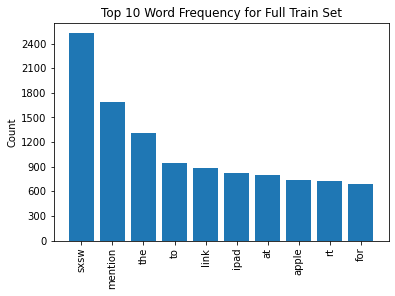

In [26]:
train_freq_dist = FreqDist(X_train['tokenized'].explode())
visualize_top_10(train_freq_dist, 'Top 10 Word Frequency for Full Train Set')

In [54]:
y_train_positive = y_train[y_train['is_there_an_emotion_directed_at_a_brand_or_product'] == 1].index
X_train_positive = X_train[X_train.index.isin(y_train_positive)]

y_train_negative = y_train[y_train['is_there_an_emotion_directed_at_a_brand_or_product'] == 0].index
X_train_negative = X_train[X_train.index.isin(y_train_negative)]

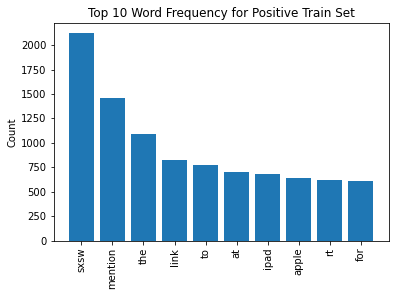

In [56]:
train_freq_dist_positive = FreqDist(X_train_positive['tokenized'].explode())
visualize_top_10(train_freq_dist_positive, 'Top 10 Word Frequency for Positive Train Set')

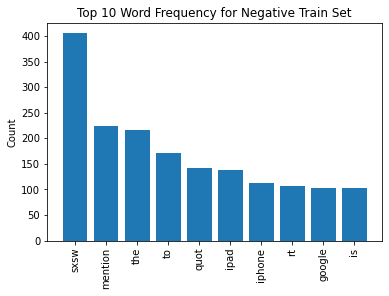

In [57]:
train_freq_dist_negative = FreqDist(X_train_negative['tokenized'].explode())
visualize_top_10(train_freq_dist_negative, 'Top 10 Word Frequency for Negative Train Set')

The frequency distributions we produced above are not very interesting because they contain stopwords. I will fit my baseline model on the dataset that contains stopwords, however I will eventually remove them and see how that improves model performance. At that point we can also take a look at how removing stopwords impacts our word frequency distributions.

In [ ]:
## Fit baseline Model

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 10)

X_train_vectorized = tfidf.fit_transform(X_train['tweet_text'])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,apple,at,for,ipad,link,mention,rt,sxsw,the,to
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424774,0.000000,0.905300
1,0.000000,0.000000,0.000000,0.686595,0.651188,0.000000,0.000000,0.323331,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.904703,0.000000,0.000000,0.000000,0.426042,0.000000,0.000000
3,0.000000,0.000000,0.721435,0.000000,0.620235,0.000000,0.000000,0.307962,0.000000,0.000000
4,0.408991,0.000000,0.420402,0.381081,0.361429,0.299890,0.000000,0.179459,0.334232,0.382471
...,...,...,...,...,...,...,...,...,...,...
2388,0.350577,0.671225,0.360357,0.000000,0.000000,0.257058,0.353375,0.153827,0.286495,0.000000
2389,0.000000,0.000000,0.000000,0.904703,0.000000,0.000000,0.000000,0.426042,0.000000,0.000000
2390,0.000000,0.000000,0.000000,0.000000,0.650069,0.000000,0.000000,0.322775,0.000000,0.687915
2391,0.760248,0.000000,0.000000,0.000000,0.000000,0.557445,0.000000,0.333584,0.000000,0.000000


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

baseline_model = RandomForestClassifier()

baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mitchellren/opt/anaconda

array([0.82672234, 0.82254697, 0.81210856, 0.82635983, 0.81799163])

In [16]:
y_train.value_counts(normalize=True)

is_there_an_emotion_directed_at_a_brand_or_product
1                                                     0.835353
0                                                     0.164647
dtype: float64

In [17]:
baseline_cv.mean()

0.8211458669997642

## Removing Stop Words and Punctuation

In [18]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
stopwords_list[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [19]:
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    new_list = []
    for token in token_list:
        if token not in stopwords_list:
            new_list.append(token)
        else:
            continue
    return new_list

In [20]:
X_train["text_without_stopwords"] = X_train["tokenized"].apply(remove_stopwords)

<ipython-input-20-c0add09b3603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["text_without_stopwords"] = X_train["tokenized"].apply(remove_stopwords)


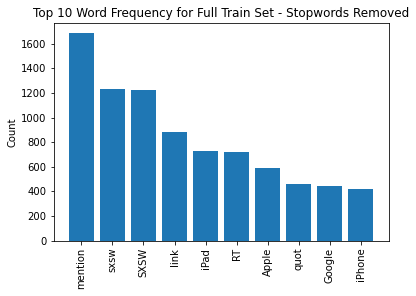

In [21]:
train_freq_dist_stopwords_removed = FreqDist(X_train['text_without_stopwords'].explode())
visualize_top_10(train_freq_dist_stopwords_removed, 'Top 10 Word Frequency for Full Train Set - Stopwords Removed')

In [22]:
# Instantiate the vectorizer
tfidf_v2 = TfidfVectorizer(max_features=10, stop_words=stopwords_list)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized_v2 = tfidf_v2.fit_transform(X_train["tweet_text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized_v2, columns=tfidf_v2.get_feature_names())

,apple,google,ipad,iphone,link,mention,quot,rt,store,sxsw
0,0.000000,0.928578,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371136
1,0.000000,0.000000,0.686595,0.00000,0.651188,0.000000,0.000000,0.000000,0.000000,0.323331
2,0.000000,0.000000,0.904703,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.426042
3,0.000000,0.000000,0.000000,0.75593,0.586352,0.000000,0.000000,0.000000,0.000000,0.291138
4,0.451919,0.000000,0.421080,0.00000,0.399365,0.331366,0.000000,0.000000,0.556636,0.198295
...,...,...,...,...,...,...,...,...,...,...
2388,0.484313,0.000000,0.000000,0.00000,0.000000,0.355118,0.000000,0.488179,0.596535,0.212508
2389,0.000000,0.000000,0.904703,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.426042
2390,0.000000,0.000000,0.000000,0.00000,0.895669,0.000000,0.000000,0.000000,0.000000,0.444722
2391,0.163740,0.000000,0.000000,0.00000,0.000000,0.120061,0.976531,0.000000,0.000000,0.071846


In [23]:
baseline_model_v2 = RandomForestClassifier()

stopwords_removed_cv = cross_val_score(baseline_model_v2, X_train_vectorized_v2, y_train)
stopwords_removed_cv

/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mitchellren/opt/anaconda

array([0.82254697, 0.81837161, 0.8308977 , 0.82635983, 0.83682008])

In [24]:
print("Baseline:         ", baseline_cv.mean())
print("Stopwords removed:", stopwords_removed_cv.mean())

Baseline:          0.8211458669997642
Stopwords removed: 0.826999240048567


In [25]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

In [26]:
stemmed_stopwords = [stemmer.stem(word) for word in stopwords_list]

In [27]:
# Instantiate the vectorizer
tfidf_v3 = TfidfVectorizer(max_features=10, stop_words=stemmed_stopwords, tokenizer=stem_and_tokenize)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized_v3 = tfidf_v3.fit_transform(X_train["tweet_text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized_v3, columns=tfidf_v3.get_feature_names())

,appl,googl,ipad,iphon,link,mention,quot,rt,store,sxsw
0,0.000000,0.928578,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371136
1,0.000000,0.000000,0.683206,0.00000,0.653892,0.000000,0.000000,0.000000,0.000000,0.325045
2,0.000000,0.000000,0.903010,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.429620
3,0.000000,0.000000,0.000000,0.75597,0.586178,0.000000,0.000000,0.000000,0.000000,0.291385
4,0.453365,0.000000,0.418401,0.00000,0.400449,0.332483,0.000000,0.000000,0.555763,0.199060
...,...,...,...,...,...,...,...,...,...,...
2388,0.485030,0.000000,0.000000,0.00000,0.000000,0.355705,0.000000,0.489225,0.594580,0.212963
2389,0.000000,0.000000,0.903010,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.429620
2390,0.000000,0.000000,0.000000,0.00000,0.895466,0.000000,0.000000,0.000000,0.000000,0.445130
2391,0.163847,0.000000,0.000000,0.00000,0.000000,0.120160,0.976494,0.000000,0.000000,0.071941


In [28]:
baseline_model_v3 = RandomForestClassifier()

stemmed_cv = cross_val_score(baseline_model_v3, X_train_vectorized, y_train)
stemmed_cv

/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mitchellren/opt/anaconda

array([0.82463466, 0.82045929, 0.81628392, 0.82426778, 0.81799163])

In [29]:
# Run this cell without changes
print("Stopwords removed:", stopwords_removed_cv.mean())
print("Stemmed:          ", stemmed_cv.mean())

Stopwords removed: 0.826999240048567
Stemmed:           0.8207274569579232


In [30]:
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, auc, roc_auc_score, balanced_accuracy_score

baseline_model_v2.fit(X_train_vectorized_v2, y_train)

# Fit the vectorizer on X_train["text"] and transform it
X_test_vectorized = tfidf_v2.fit_transform(X_test["tweet_text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized_v2, columns=tfidf_v2.get_feature_names())

y_hat_no_stopwords = baseline_model_v2.predict(X_test_vectorized)

<ipython-input-30-b9b0c759b0fa>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  baseline_model_v2.fit(X_train_vectorized_v2, y_train)


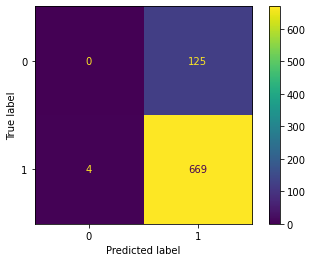

In [31]:
cm = confusion_matrix(y_test, y_hat_no_stopwords, labels = baseline_model_v2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=baseline_model_v2.classes_)
disp.plot()
plt.show()

In [32]:
'It looks like the model is not learing and predicting negative sentiment cases well. This could be due to the class imbalance in the underlying data'

'It looks like the model is not learing and predicting negative sentiment cases well. This could be due to the class imbalance in the underlying data'

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
X_train, X_test, y_train, y_test = train_test_split(binary_df_nonulls['tweet_text'], binary_df_nonulls['is_there_an_emotion_directed_at_a_brand_or_product'].values, test_size=0.25)

In [48]:
from collections import Counter

In [49]:
Counter(y_train)

Counter({0: 393, 1: 2000})

In [50]:
vectorizer = TfidfVectorizer(stop_words=stemmed_stopwords)
vectorizer.fit(X_train)

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'our',
                            'ourselv', 'you', "you'r", "you'v", "you'll",
                            "you'd", 'your', 'your', 'yourself', 'yourselv',
                            'he', 'him', 'his', 'himself', 'she', 'she', 'her',
                            'her', 'herself', 'it', 'it', 'it', 'itself', ...])

In [51]:
X_train_tf = vectorizer.transform(X_train)

In [52]:
X_train_tf = X_train_tf.toarray()

In [53]:
X_test_tf = vectorizer.transform(X_test)
X_test_tf = X_test_tf.toarray()

In [54]:
ROS = RandomOverSampler(sampling_strategy=1)
X_train_ros, y_train_ros = ROS.fit_resample(X_train_tf, y_train)

In [55]:
Counter(y_train_ros)

Counter({0: 2000, 1: 2000})

In [56]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_ros, y_train_ros)
y_preds = nb.predict(X_test_tf)

print(accuracy_score(y_test, y_preds))

0.7619047619047619


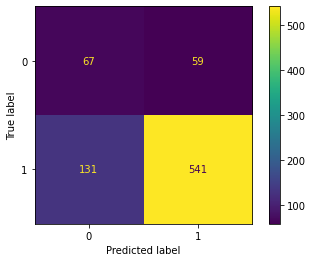

In [57]:
cm = confusion_matrix(y_test, y_preds, labels = nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=nb.classes_)
disp.plot()
plt.show()

## Creating Bigrams

0.8483709273182958


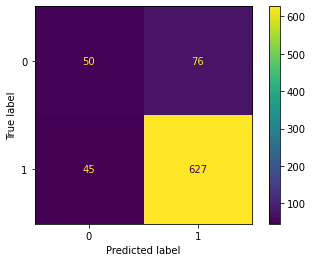

In [58]:
vectorizer = TfidfVectorizer(stop_words=stemmed_stopwords, ngram_range = (1,2))
vectorizer.fit(X_train)
X_train_tf = vectorizer.transform(X_train)
X_train_tf = X_train_tf.toarray()
X_test_tf = vectorizer.transform(X_test)
X_test_tf = X_test_tf.toarray()
ROS = RandomOverSampler(sampling_strategy=1)
X_train_ros, y_train_ros = ROS.fit_resample(X_train_tf, y_train)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_ros, y_train_ros)
y_preds = nb.predict(X_test_tf)

print(accuracy_score(y_test, y_preds))

cm = confusion_matrix(y_test, y_preds, labels = nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=nb.classes_)
disp.plot()
plt.show()

## Using Mutual Information Scores


## Build Pipeline

## Incorporate Neutral Sentiment

## Incorporate Product Specific Sentiment (Google vs. Apple)